In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import saraRC1 as sara

**Multi-Plot**

In [2]:
img_path = './Siris Dataset/ASSR/images/train/'
imgs = {}

i = 0
max_ = 10

for root, dirs, files in os.walk(img_path):
    for file in files:
        file_name = file.split('.')[0]
        imgs[file_name] = cv2.cvtColor(cv2.imread(os.path.join(root, file)), cv2.COLOR_BGR2RGB)
        i += 1

        if i == max_:
            break

In [3]:
mask_path = './Siris Dataset/ASSR/gt/train/'
masks = {}
gt_ranks = {}

for file_name in imgs:
    gt_ranks[file_name] = {}
    
    file = file_name + '.png'
    mask = cv2.cvtColor(cv2.imread(os.path.join(mask_path, file)), cv2.COLOR_BGR2GRAY)
    # masks[file_name] = cv2.cvtColor(cv2.imread(os.path.join(mask_path, file)), cv2.COLOR_BGR2GRAY)
    # Separate the mask based on colour
    masks[file_name] = {}

    # Detect different colours in mask
    # Create histogram
    hist = cv2.calcHist([mask], [0], None, [256], [0, 256])

    # Show non-zero values and extract intensity values at that freq
    non_zero = np.nonzero(hist)
    x = non_zero[0][1:]

    # Separate mask into regions which match the intensity values in x
    for i, intensity in enumerate(reversed(x)):
        masks[file_name][i] = np.where(mask == intensity, 1, 0)
        
        # Calculate ranks based on highest intensity
        gt_ranks[file_name][i] = i + 1


In [5]:
gt_ranks

{'COCO_train2014_000000000009': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
 'COCO_train2014_000000000089': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
 'COCO_train2014_000000000307': {0: 1, 1: 2, 2: 3},
 'COCO_train2014_000000000321': {0: 1, 1: 2, 2: 3},
 'COCO_train2014_000000000332': {0: 1, 1: 2, 2: 3},
 'COCO_train2014_000000000349': {0: 1, 1: 2, 2: 3, 3: 4},
 'COCO_train2014_000000000382': {0: 1, 1: 2, 2: 3},
 'COCO_train2014_000000000389': {0: 1, 1: 2, 2: 3, 3: 4},
 'COCO_train2014_000000000419': {0: 1, 1: 2, 2: 3},
 'COCO_train2014_000000000443': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5}}

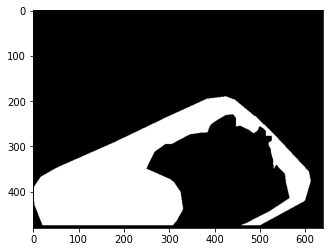

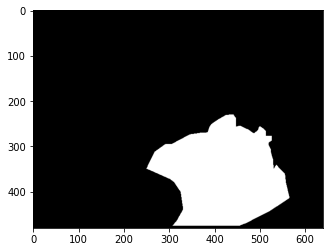

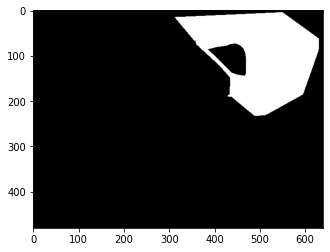

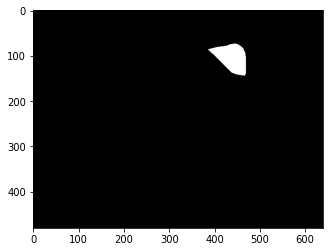

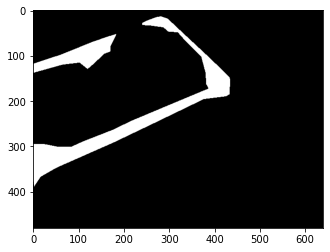

In [6]:
for mask in masks[list(masks.keys())[0]]:
    plt.imshow(masks[list(masks.keys())[0]][mask], cmap='gray')
    plt.show()

In [4]:
seg_dim = 8
saliency_maps = {}
sara_heatmaps = {}
sara_lists = {}

In [6]:
from time import time

plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.tight_layout()

generators = ['itti', 'deepgaze', 'fpn', 'emlnet']

g = 1

for i, im in enumerate(imgs):
    start = time()

    if im not in saliency_maps:
        saliency_maps[im] = {}
        sara_heatmaps[im] = {}
        sara_lists[im] = {}

    for generator in generators:
        percent = round(g/(len(imgs)*len(generators))*100, 2)
        
        print(f'--> Processing image {i+1} of {len(imgs)} ({generator}) [{percent}%]')

        saliency_maps[im][generator] = sara.return_saliency(imgs[im].copy(), generator=generator)
        sara.reset()

        sara_heatmaps[im][generator], sara_lists[im][generator] = sara.return_sara(imgs[im].copy(), seg_dim, saliency_map=saliency_maps[im][generator])
        sara.reset()

        g += 1
    
    print(f'Time for image {i + 1}: {time() - start} seconds')


--> Processing image 1 of 10 (itti) [2.5%]
--> Processing image 1 of 10 (deepgaze) [5.0%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 1 of 10 (fpn) [7.5%]
--> Processing image 1 of 10 (emlnet) [10.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth
Time for image 1: 13.375653982162476 seconds
--> Processing image 2 of 10 (itti) [12.5%]
--> Processing image 2 of 10 (deepgaze) [15.0%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 2 of 10 (fpn) [17.5%]
--> Processing image 2 of 10 (emlnet) [20.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth
Time for image 2: 15.4432213306427 seconds
--> Processing image 3 of 10 (itti) [22.5%]
--> Processing image 3 of 10 (deepgaze) [25.0%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 3 of 10 (fpn) [27.5%]
--> Processing image 3 of 10 (emlnet) [30.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth
Time for image 3: 17.16624355316162 seconds
--> Processing image 4 of 10 (itti) [32.5%]
--> Processing image 4 of 10 (deepgaze) [35.0%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 4 of 10 (fpn) [37.5%]
--> Processing image 4 of 10 (emlnet) [40.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth
Time for image 4: 14.76242995262146 seconds
--> Processing image 5 of 10 (itti) [42.5%]
--> Processing image 5 of 10 (deepgaze) [45.0%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 5 of 10 (fpn) [47.5%]
--> Processing image 5 of 10 (emlnet) [50.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth
Time for image 5: 13.80938196182251 seconds
--> Processing image 6 of 10 (itti) [52.5%]
--> Processing image 6 of 10 (deepgaze) [55.0%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 6 of 10 (fpn) [57.5%]
--> Processing image 6 of 10 (emlnet) [60.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth
Time for image 6: 14.003207921981812 seconds
--> Processing image 7 of 10 (itti) [62.5%]
--> Processing image 7 of 10 (deepgaze) [65.0%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 7 of 10 (fpn) [67.5%]
--> Processing image 7 of 10 (emlnet) [70.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth
Time for image 7: 14.102040529251099 seconds
--> Processing image 8 of 10 (itti) [72.5%]
--> Processing image 8 of 10 (deepgaze) [75.0%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 8 of 10 (fpn) [77.5%]


KeyboardInterrupt: 

<Figure size 1440x720 with 0 Axes>

In [7]:
import torch

In [ ]:
# Save to pickle
import pickle

with open('saliency_maps.pkl', 'wb') as f:
    pickle.dump(saliency_maps, f)

with open('sara_heatmaps.pkl', 'wb') as f:
    pickle.dump(sara_heatmaps, f)

with open('sara_lists.pkl', 'wb') as f:
    pickle.dump(sara_lists, f)

In [ ]:
# Load from pickle
import pickle

with open('saliency_maps.pkl', 'rb') as f:
    saliency_maps = pickle.load(f)

with open('sara_heatmaps.pkl', 'rb') as f:
    sara_heatmaps = pickle.load(f)

with open('sara_lists.pkl', 'rb') as f:
    sara_lists = pickle.load(f)

**<h2>Mask Ranking</h2>**

In [10]:
T = 0.05

In [11]:
def index_to_coordinates(index, seg_dim, im_size):
    '''
    Given an index and a shape, this function returns the corresponding coordinates.
    '''

    x1 = int((index % seg_dim) * (im_size[1] / seg_dim))
    y1 = int((index // seg_dim) * (im_size[0] / seg_dim))

    x2 = int(x1 + (im_size[1] / seg_dim))
    y2 = int(y1 + (im_size[0] / seg_dim))
    
    return (x1, y1, x2, y2)

In [12]:
# get 2 dimensions
sara_heatmaps[sara_list]['deepgaze'].shape[0:2]

NameError: name 'sara_list' is not defined

In [198]:
masks[sara_list]

{0: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 1: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 2: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 3: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 4: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [13]:
# For each segment, check which mask falls under that segment using MRn = rank(Gi); (Gi interesect Mn) > T
mask_segments = {}

for sara_list in sara_lists:
    for segment in sara_lists[sara_list]['itti']:
        if sara_list not in mask_segments:
            mask_segments[sara_list] = {}

        # Convert index to coordinates, extract segment from heatmap
        shape = sara_heatmaps[sara_list]['itti'].shape[0:2]
        x1, y1, x2, y2 = index_to_coordinates(segment[5], seg_dim, shape)
        print(x1, y1, x2, y2)

        for m in masks[sara_list]:
            if m not in mask_segments[sara_list]:
                mask_segments[sara_list][m] = []

            # Extract mask from masks
            mask = masks[sara_list][m][y1:y2, x1:x2]

            # Calculate intersection over union
            intersection = np.sum(mask > 0)
            union = np.sum(mask > 0) + np.sum(mask == 0)

            iou = intersection / union

            print('Segment: ', segment[5], 'Mask: ', m, 'IoU: ', iou)

            if iou > T:
                # index, rank, saliency
                print('HERE')
                print(segment)
                mask_segments[sara_list][m].append((segment[5], segment[0], segment[1]))
                print(mask_segments)

560 420 640 480
Segment:  63 Mask:  0 IoU:  0.0925
Segment:  63 Mask:  1 IoU:  0.0
Segment:  63 Mask:  2 IoU:  0.0
Segment:  63 Mask:  3 IoU:  0.0
Segment:  63 Mask:  4 IoU:  0.0
480 420 560 480
Segment:  62 Mask:  0 IoU:  0.3258333333333333
HERE
(44, 655046914.2590985, 655046912.2864436, 0.9726549474122855, 1, 62, 4)
{'COCO_train2014_000000000009': {0: [(62, 44, 655046914.2590985)], 1: [], 2: [], 3: [], 4: []}}
Segment:  62 Mask:  1 IoU:  0.3772916666666667
HERE
(44, 655046914.2590985, 655046912.2864436, 0.9726549474122855, 1, 62, 4)
{'COCO_train2014_000000000009': {0: [(62, 44, 655046914.2590985)], 1: [(62, 44, 655046914.2590985)], 2: [], 3: [], 4: []}}
Segment:  62 Mask:  2 IoU:  0.0
Segment:  62 Mask:  3 IoU:  0.0
Segment:  62 Mask:  4 IoU:  0.0
400 420 480 480
Segment:  61 Mask:  0 IoU:  0.020416666666666666
Segment:  61 Mask:  1 IoU:  0.8914583333333334
HERE
(36, 2180542528.907711, 2180542526.907711, 1.0, 1, 61, 4)
{'COCO_train2014_000000000009': {0: [(62, 44, 655046914.2590985)]

In [234]:
mask_segments.keys()

dict_keys(['COCO_train2014_000000000009', 'COCO_train2014_000000000089'])

In [15]:
# For each mask, find the segment with the lowest rank
mask_segments_min = {}

for sara_list in mask_segments:
    for m in mask_segments[sara_list]:
        # mask_segments_min[sara_list][m] = min(mask_segments[sara_list][m], key=lambda x: x[1])[0]
        if sara_list not in mask_segments_min:
            mask_segments_min[sara_list] = {}
        
        mask_segments_min[sara_list][m] = min(mask_segments[sara_list][m], key=lambda x: x[1])

mask_segments_min

ValueError: min() arg is an empty sequence

In [16]:
mask_ranks = {}

for sara_list in mask_segments_min:
    mask_ranks[sara_list] = {}
    # Extract the ranks and sort them by the third value in each tuple
    sorted_ranks = sorted(mask_segments_min[sara_list].items(), key=lambda x: x[1][1])

    for i in range(len(sorted_ranks)):
        mask_ranks[sara_list][sorted_ranks[i][0]] = i + 1

    # Sort mask_ranks[sara_list] by object
    mask_ranks[sara_list] = {k: v for k, v in sorted(mask_ranks[sara_list].items(), key=lambda item: item[0])}

In [17]:
mask_ranks

{'COCO_train2014_000000000009': {0: 4, 1: 1, 2: 3, 3: 5, 4: 2},
 'COCO_train2014_000000000089': {0: 2, 1: 3, 2: 4, 3: 1, 4: 5},
 'COCO_train2014_000000000307': {0: 1, 1: 2}}

**<h2>Spearman Correlation (Metric for Ranks)</h2>**

In [18]:
list(mask_ranks['COCO_train2014_000000000009'].values())

[4, 1, 3, 5, 2]

In [19]:
import scipy.stats as sc

all_spr = 0

for sara_list in mask_ranks:
    print(f'PR: {list(mask_ranks[sara_list].values())}\nGT: {list(gt_ranks[sara_list].values())}')
    spr = sc.spearmanr(list(mask_ranks[sara_list].values()), list(gt_ranks[sara_list].values()))
    all_spr += spr.correlation
    print()

print(f'Average SPR: {all_spr / len(mask_ranks)}')

PR: [4, 1, 3, 5, 2]
GT: [1, 2, 3, 4, 5]

PR: [2, 3, 4, 1, 5]
GT: [1, 2, 3, 4, 5]

PR: [1, 2]
GT: [1, 2, 3]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 3

**<h2>Normalizing Spearman Correlation</h2>**

In [7]:
def get_norm_spr(spr_value):
    #       m - r_min
    # m -> ---------------- x (t_max - t_min) + t_min
    #       r_max - r_min
    #
    # m = measure value
    # r_min = min range of measurement
    # r_max = max range of measurement
    # t_min = min range of desired scale
    # t_max = max range of desired scale

    r_min = -1
    r_max = 1

    norm_spr = (spr_value - r_min) / (r_max - r_min)

    return norm_spr

In [8]:
norm_spr = get_norm_spr(spr.correlation)
print(norm_spr)

0.6360347985347985
